Shortest path: ([7, 5, 10, 4, 6, 11, 9, 8, 2, 1, 3, 0], 447.9820329677017)
All generated routes:
([5, 10, 4, 8, 7, 1, 6, 11, 9, 3, 2, 0], 560.3791026123723)
([10, 4, 5, 3, 1, 11, 6, 9, 8, 7, 2, 0], 485.8388018276157)
([10, 4, 5, 6, 1, 11, 9, 8, 7, 3, 2, 0], 547.9328813833295)
([2, 9, 6, 1, 5, 10, 4, 7, 3, 11, 8, 0], 569.9619375969851)
([6, 11, 9, 10, 4, 7, 5, 1, 8, 2, 3, 0], 603.545925559089)
([11, 6, 9, 2, 8, 5, 10, 7, 3, 1, 4, 0], 589.2028623547396)
([7, 5, 10, 4, 6, 11, 9, 8, 2, 1, 3, 0], 447.9820329677017)
([7, 4, 9, 11, 6, 2, 8, 10, 5, 3, 1, 0], 514.2433663249745)
([10, 5, 11, 9, 4, 6, 8, 1, 2, 7, 3, 0], 610.2704315611398)


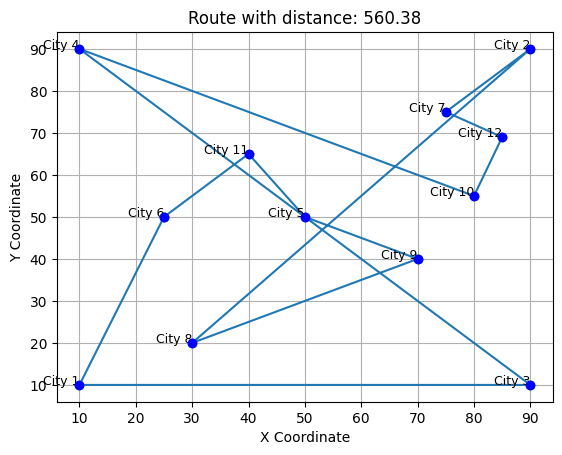

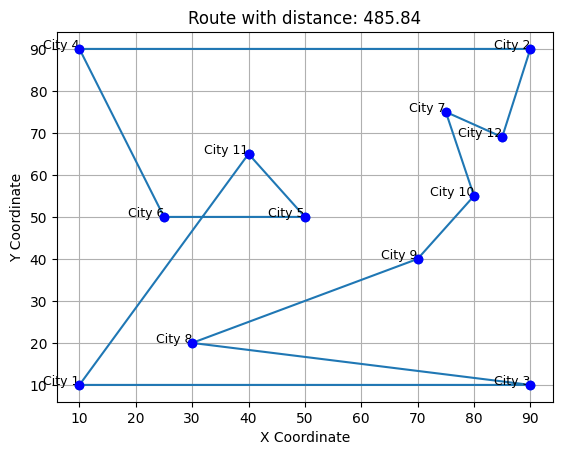

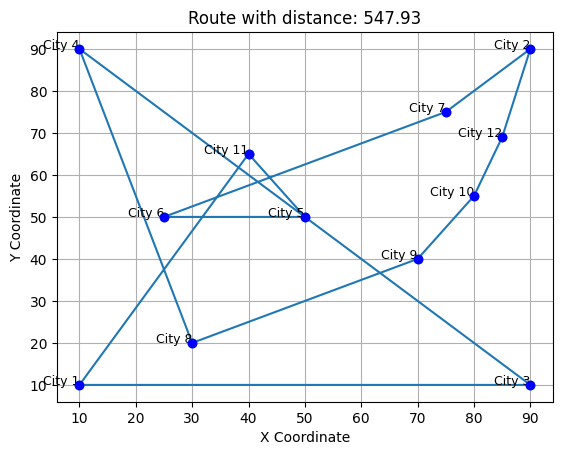

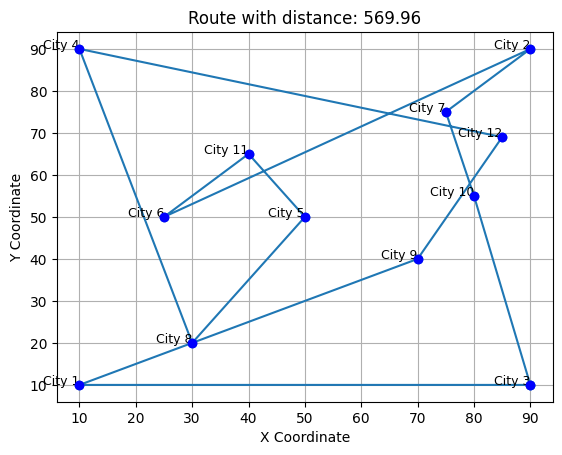

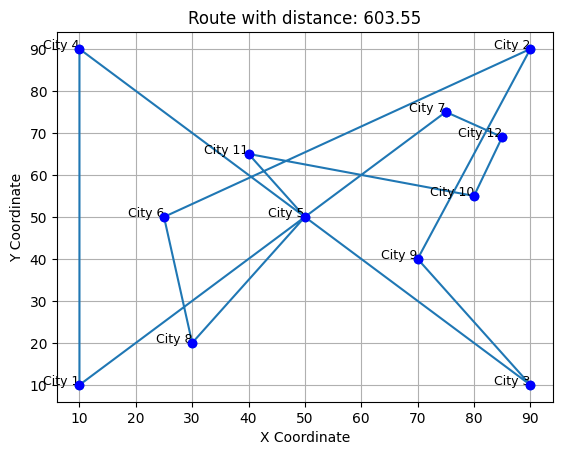

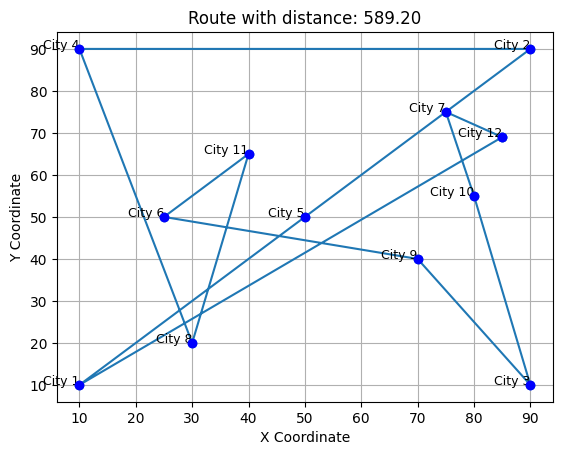

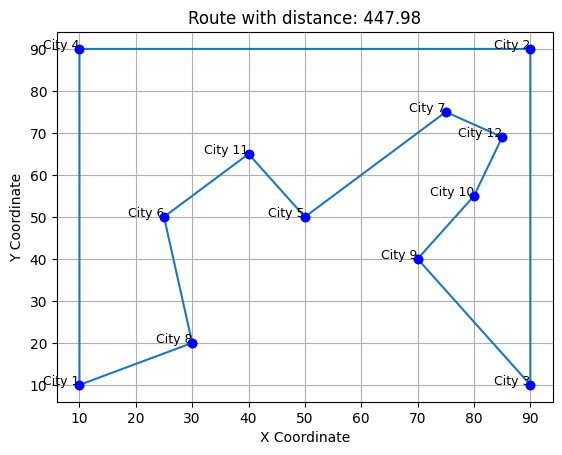

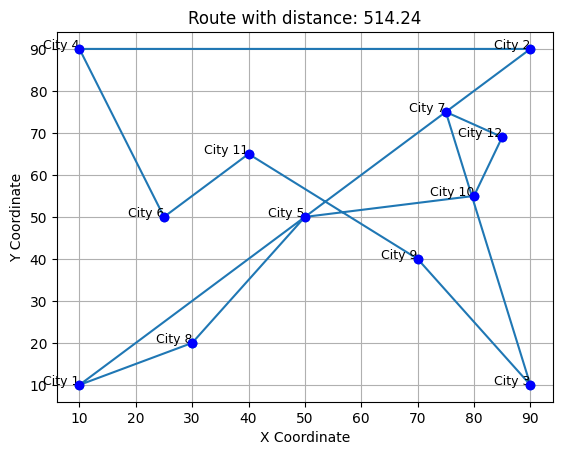

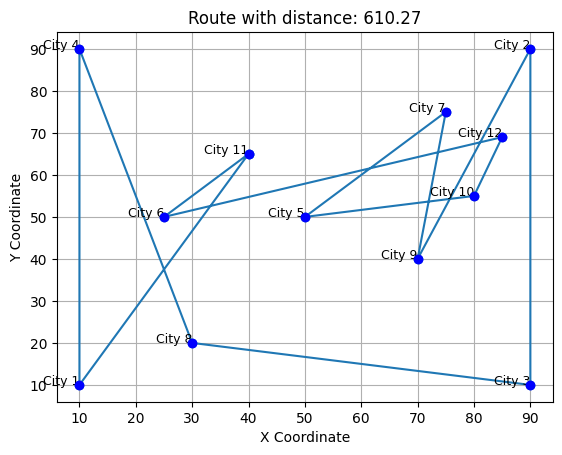

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.all_routes = []  # Store all routes generated

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.all_routes.extend(all_paths)  # Capture all routes
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        while len(visited) < len(self.distances):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)  # Return to the start to close the loop
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[0]][path[-1]]  # Return to start
        return total_dist

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]

def plot_routes(coordinates, routes):
    for route, dist in routes:
        route_coords = coordinates[np.array(route)]
        route_coords = np.vstack([route_coords, route_coords[0]])  # Close the loop
        plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
        plt.plot(route_coords[:, 0], route_coords[:, 1], linestyle='-', marker='o')
        for i, coord in enumerate(coordinates):
            plt.text(coord[0], coord[1], f'City {i+1}', fontsize=9, ha='right')
        plt.title(f'Route with distance: {dist:.2f}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()

# Example coordinates and usage
coordinates = np.array([
    [10, 10],  # City 1
    [90, 90],  # City 2
    [90, 10],  # City 3
    [10, 90],  # City 4
    [50, 50],  # City 5
    [25, 50],   # City 6
    [75, 75],  # City 7
    [30, 20],  # City 8
    [70,40],
    [80,55],
    [40, 65],
    [85, 69]
])
distances = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(len(coordinates))] for i in range(len(coordinates))])
np.fill_diagonal(distances, np.inf)

aco = AntColony(distances, n_ants=3, n_best=1, n_iterations=3, decay=0.95, alpha=1, beta=2)
result = aco.run()
print(f"Shortest path: {result}")

# Print and plot all generated routes
print("All generated routes:")
for path in aco.all_routes:
    print(path)
plot_routes(coordinates, aco.all_routes)


 Import Libraries and Distance Calculation Function

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)


2. AntColony Class Definition
This part defines the AntColony class, initializing with parameters for the colony and setting up the environment for the ants to operate in.



In [10]:
class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta


3. ACO Algorithm Execution Method
Defines the run method which controls the main execution of the ACO algorithm, iterating through the generation of paths and updating of pheromones.

In [16]:
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path


4. Path Generation and Pheromone Spreading
This section contains methods that generate all possible paths for the ants and spread pheromones along the paths, encouraging shorter paths in future iterations.

In [12]:
    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]


5. Individual Path Generation for Ants
Explains how each ant generates a path based on current pheromone levels and distances to unvisited cities.

In [13]:
    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move


6. Visualization
Defines a function to plot the route of the best path found by the ant colony, visualizing the journey of the ants through the cities.

In [20]:
def plot_route(coordinates, route):
    route_coordinates = coordinates[route]
    route_coordinates = np.vstack([route_coordinates, route_coordinates[0]])
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], f'City {i+1}', fontsize=12, ha='right')
    plt.title('Traveling Salesman Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()


Shortest path: ([7, 5, 3, 10, 4, 6, 1, 11, 9, 8, 2, 0], 379.6784294290549)


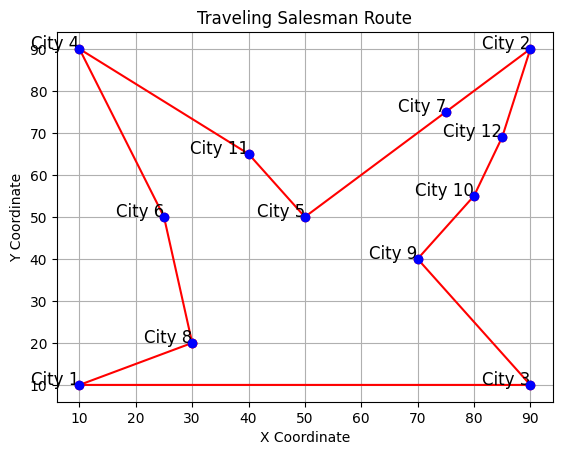

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[-1]][path[0]]  # Return to start
        return total_dist

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

def plot_route(coordinates, route):
    route_coordinates = coordinates[route]
    route_coordinates = np.vstack([route_coordinates, route_coordinates[0]])
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], f'City {i+1}', fontsize=12, ha='right')
    plt.title('Traveling Salesman Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Example coordinates and usage
coordinates = np.array([
    [10, 10],  # City 1
    [90, 90],  # City 2
    [90, 10],  # City 3
    [10, 90],  # City 4
    [50, 50],  # City 5
    [25, 50],   # City 6
    [75, 75],  # City 7
    [30, 20],  # City 8
    [70, 40],
    [80, 55],
    [40, 65],
    [85, 69]
])
distances = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(len(coordinates))] for i in range(len(coordinates))])
np.fill_diagonal(distances, np.inf)

aco = AntColony(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
result = aco.run()
print(f"Shortest path: {result}")

# Plot the route
plot_route(coordinates, result[0])


The time complexity of the Ant Colony Optimization (ACO) approach for solving the Traveling Salesman Problem (TSP) can be quite complex to analyze due to its stochastic and iterative nature. However, we can break down the complexity based on several key factors and typical operations within the algorithm. The primary factors influencing the time complexity are:

1. **N**: The number of cities (nodes) in the TSP.
2. **M**: The number of ants used in the algorithm.
3. **T**: The number of iterations the algorithm runs.

### Breakdown of Operations

- **Path Construction**: Each ant constructs a complete tour in each iteration. The construction of a single tour involves making \(N-1\) decisions (since the start city is fixed and each city is visited exactly once). Each decision involves calculating the probability of moving to each of the unvisited cities, which requires considering all remaining unvisited cities. The time complexity of constructing a path by one ant is \(O(N^2)\).
  
- **Pheromone Update**: After all ants have constructed their tours, the pheromones on the edges need updating. If only the best \(k\) ants' paths are used to update the pheromones (as often is the case to avoid rapid convergence), then the complexity depends on \(k\). Typically, the update operation itself involves iterating over the entire tour of each ant and updating pheromones along each edge, thus having a complexity of \(O(N)\) per ant. For \(k\) best ants, this would be \(O(kN)\).

- **Pheromone Evaporation**: The global update also includes pheromone evaporation on all edges, which has a complexity of \(O(N^2)\) because each edge's pheromone level must be adjusted.

### Overall Complexity

Given the above operations, the complexity per iteration can be estimated as follows:

- Path construction for all ants: \(M \times O(N^2) = O(MN^2)\).
- Pheromone update (if using \(k\) best ants): \(O(kN)\).
- Pheromone evaporation across all edges: \(O(N^2)\).

Since these operations are repeated for \(T\) iterations, the overall time complexity of the algorithm can be approximated as:

\[ O(T \times (MN^2 + kN + N^2)) \]

This simplifies further to:

\[ O(T \times MN^2) \]


In [23]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the Euclidean distance between two points in a 2D space.
def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

# Define the AntColony class to implement the Ant Colony Optimization algorithm.
class AntColony:
    # The constructor initializes the environment and algorithm parameters.
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)  # Convert 0s in distances to inf to avoid division by zero.
        self.pheromone = np.ones(self.distances.shape) / len(distances)  # Initialize pheromone levels uniformly.
        self.all_inds = range(len(distances))  # Indices of the cities.
        self.n_ants = n_ants  # Number of ants in the simulation.
        self.n_best = n_best  # Number of best paths to consider in pheromone update.
        self.n_iterations = n_iterations  # Number of iterations the algorithm will run.
        self.decay = decay  # Rate at which pheromone decays.
        self.alpha = alpha  # Influence of pheromone on direction.
        self.beta = beta  # Influence of heuristic value (inverse of distance).

    # The run method executes the algorithm over a fixed number of iterations.
    def run(self):
        shortest_path = None  # Initialize shortest path found in current iteration.
        all_time_shortest_path = ("route", float('inf'))  # Initialize the best path found across all iterations.
        for i in range(self.n_iterations):  # Loop over the number of iterations.
            all_paths = self.gen_all_paths()  # Generate paths for all ants.
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)  # Update pheromones on the paths.
            shortest_path = min(all_paths, key=lambda x: x[1])  # Find the shortest path in the current iteration.
            if shortest_path[1] < all_time_shortest_path[1]:  # Compare with the best path found so far.
                all_time_shortest_path = shortest_path  # Update the best path if current one is better.
            self.pheromone *= self.decay  # Apply decay to pheromone.
        return all_time_shortest_path  # Return the best path found.

    # Generate all paths that ants travelled in one iteration.
    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):  # Loop over each ant.
            path = self.gen_path(0)  # Generate a path for each ant starting from city 0.
            all_paths.append((path, self.gen_path_dist(path)))  # Append the path and its distance.
        return all_paths

    # Calculate the total distance of a path.
    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):  # Sum up the distances of each leg of the journey.
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[-1]][path[0]]  # Include the return to the starting point.
        return total_dist

    # Spread pheromone on the paths used by the best n ants.
    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])  # Sort paths by distance.
        for path, dist in sorted_paths[:n_best]:  # Update pheromones on the best n paths.
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]  # Add pheromone inversely proportional to the distance.
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]  # Also update the return leg.

    # Generate a path for an ant starting from a specific city.
    def gen_path(self, start):
        path = [start]  # Start the path with the initial city.
        visited = set([start])  # Keep track of visited cities to avoid revisiting.
        prev = start  # Set the previous city as the start.
        for i in range(len(self.distances) - 1):  # Loop to create a path that visits every city.
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)  # Choose the next city to move to.
            path.append(move)  # Add the next city to the path.
            visited.add(move)  # Mark the next city as visited.
            prev = move  # Update the previous city.
        path.append(start)  # Complete the cycle by returning to the start.
        return path

    # Choose the next move for an ant based on pheromone levels and distances.
    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)  # Copy pheromone levels to avoid modifying the original.
        pheromone[list(visited)] = 0  # Eliminate already visited cities by setting their pheromone to zero.
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)  # Calculate the probabilities for each move.
        norm_row = row / row.sum()  # Normalize the probabilities.
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]  # Choose the next city based on the probabilities.
        return move

# Function to plot the route on a 2D plot.
def plot_route(coordinates, route):
    route_coordinates = coordinates[route]  # Extract the coordinates for the route.
    route_coordinates = np.vstack([route_coordinates, route_coordinates[0]])  # Close the loop by returning to the start.
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)  # Plot the cities as blue points.
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], color='red', linestyle='-', marker='o')  # Draw the route with red lines and markers.
    for i, coord in enumerate(coordinates):  # Annotate the cities with labels.
        plt.text(coord[0], coord[1], f'City {i+1}', fontsize=12, ha='right')
    plt.title('Traveling Salesman Route')  # Title of the plot.
    plt.xlabel('X Coordinate')  # X-axis label.
    plt.ylabel('Y Coordinate')  # Y-axis label.
    plt.grid(True)  # Turn on the grid.
    plt.show()  # Display the plot.

# Main code to set up the problem and run the optimization.
coordinates = np.array([  # Array of coordinates for each city.
    [10, 10],  # City 1
    [90, 90],  # City 2
    [90, 10],  # City 3
    [10, 90],  # City 4
    [50, 50],  # City 5
    [25, 50],  # City 6
    [75, 75],  # City 7
    [30, 20],  # City 8
    [70, 40],
    [80, 55],
    [40, 65],
    [85, 69]
])
distances = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(len(coordinates))] for i in range(len(coordinates))])  # Create distance matrix.
np.fill_diagonal(distances, np.inf)  # Set diagonal to inf to avoid zero distance.

aco = AntColony(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)  # Create an instance of AntColony.
result = aco.run()  # Run the optimization.
print(f"Shortest path: {result}")  # Print the shortest path found.

# Plot the route of the shortest path.
plot_route(coordinates, result[0])


Shortest path: ('route', inf)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices